In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import ipywidgets as w

# Задание 1. Метод линейной интерполяции.
Решить краевую задачу:

$$
\begin{aligned}
&y^{\prime \prime}+(1-4 x) y^{\prime}+8 y=5, \quad 0<x<1 \\
&y^{\prime}(0)-y(0)=0 ; \quad y(1)=0
\end{aligned}
$$ 

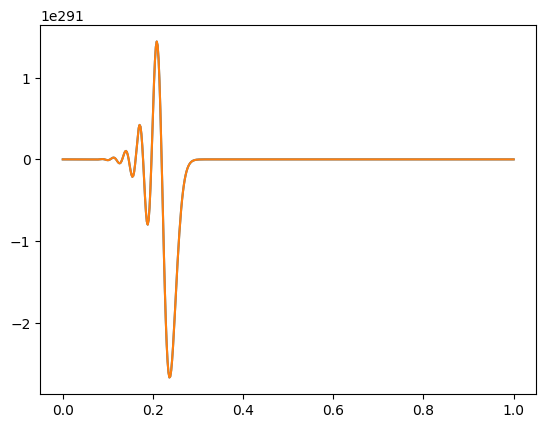

In [32]:
def p(x):
    return (1-4*x)
def q(x):
    return 8
f = 5

n = 500
x = np.linspace(0,1,n)

y1 = np.zeros(n)
h = x[1] - x[0]
y1[-1] = 0
y1[-2] = -h + 4*h**2
for i in range(n-3, 0, -1):
    y1[i-1] = (10*h**2 - 16*y1[i]*h**2 - 2*y1[i+1] + 4*y1[i] - (1-4*(i*h))*x[i+1]*h)/(3 - 4*(i*h))\


y2 = np.zeros(n)
y2[-1] = 0
y2[-2] = 4*h**2
for i in range(n-3, 0, -1):
    y2[i-1] = (10*h**2 - 16*y2[i]*h**2 - 2*y2[i+1] + 4*y2[i] - (1-4*(i*h))*x[i+1]*h)/(3 - 4*(i*h))\


b1 = (y1[1] - y1[0])/h - y1[0]
b2 = (y2[1] - y2[0])/h - y2[0]

y = y1 + (y2 - y1)*(0 - 1)/(0-1)
plt.plot(x,y2)
plt.plot(x,y)


# Задание 2.
Рассмотрим решение следующей граничной задачи

$$
\begin{gathered}
d^{2} y / d x^{2}=-y+x \cos x \\
\\
d y(0) / d x=3 y(0)+2, \quad d y(\pi / 2) / d x=-5 y(\pi / 2)+2 .
\end{gathered}
$$

Известно точное решение этой задачи


$$
y=-0.73 \cos x-0.441 \sin x+(1 / 4)\left(x^{2} \sin x+x \cos x\right),
$$


откуда


$$
y(\pi / 2)=0.175 \text { и } d y(\pi / 2) / d x=1.122 .
$$


Найдите эти граничные значения, решая задачу методом дифференциальной прогонки. 

In [36]:
n = 100
x = np.linspace(0,np.pi/2,n)

a_00 = 3
a_10 = 2
b_00 = -5
b_10 = 2

a0 = np.zeros(n)
a1 = np.zeros(n)
h = x[1] - x[0]
a0[0] = a_00
a1[0] = a_10


for i in range(n-1):
    a0[i+1] = a0[i] + h*(-1 - a0[i]**2)
    a1[i+1] = a1[i] + h*(i*h*np.cos(i*h) - a0[i]*a1[i])

y_b = (b_10 - a1[n-1])/(a0[n-1] - b_00)
dy_b = (b_00*a1[n-1] - b_10*a0[n-1])/(b_00 - a0[n-1])

print(y_b, dy_b)







0.17554480770866981 1.122275961456651


## Задание.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$



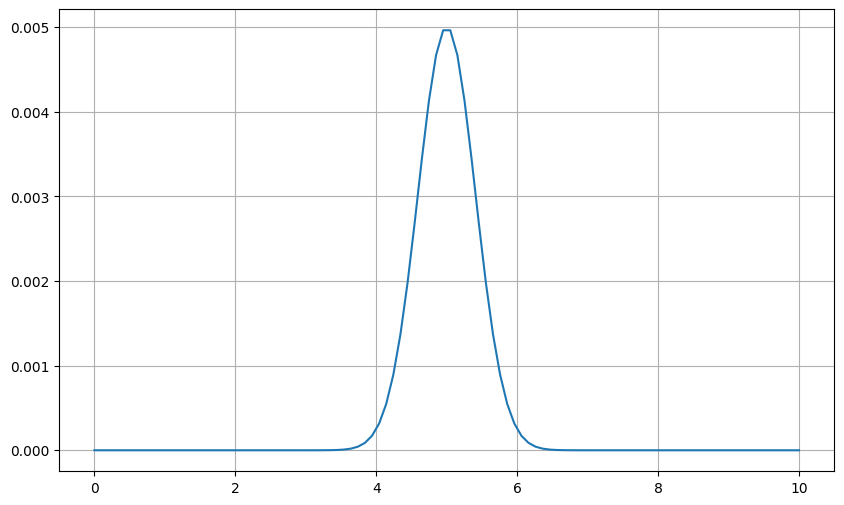

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
n = lambda x: 1 + np.exp(-3*(x-5)**2)
f = lambda x, y: np.exp(y) - n(x)
a, b = 0, 10
n = 100
h = (b-a) / n
eps = 1e-2

x = np.linspace(0, 10, n)
y_0 = np.zeros(n)
y = np.copy(y_0)

while True:
    for i in range(1, n-1):
        y[i] = (h**2 * (np.exp(y_0[i])- 1 + np.exp(-3*(x[i] - 5)**2)) + y_0[i-1] + y_0[i+1]) / 2
    if np.max(np.abs(y_0 - y)) < eps:
        break     
    y_0 = np.copy(y)

# Построение графика решения
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.grid()
plt.show()
